## Dataset description

The dataset is from the U.S. Small Business Administration (SBA) The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment. There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans.  
More info on the original dataset: https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied



## Preparation

Use dataset provided in the eLearning

In [209]:
import pandas as pd
pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

### Load data

In [341]:
data = pd.read_csv('SBA_loans_project_1.csv', nrows=10000)

In [285]:
print("Data shape:", data.shape)

Data shape: (10000, 21)


In [342]:
x=data.MIS_Status.unique()
print(x)

['P I F' 'CHGOFF' nan]


In [343]:
# Drop null values from specified columns
data.dropna(subset=['MIS_Status'], inplace=True)

## Dataset preparation and clean-up

Modify and clean-up the dataset as following:
- Replace encode Na/Null values
- Convert the strings styled as '$XXXX.XX' to float values. Columns = ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']
- Convert MIS_Status to 0/1. Make value "CHGOFF" as 1

Any additional clean-up as you find fit.

In [288]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9982 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              9982 non-null   int64  
 1   City               9982 non-null   object 
 2   State              9982 non-null   object 
 3   Zip                9982 non-null   int64  
 4   Bank               9964 non-null   object 
 5   BankState          9964 non-null   object 
 6   NAICS              9982 non-null   int64  
 7   Term               9982 non-null   int64  
 8   NoEmp              9982 non-null   int64  
 9   NewExist           9981 non-null   float64
 10  CreateJob          9982 non-null   int64  
 11  RetainedJob        9982 non-null   int64  
 12  FranchiseCode      9982 non-null   int64  
 13  UrbanRural         9982 non-null   int64  
 14  RevLineCr          9925 non-null   object 
 15  LowDoc             9961 non-null   object 
 16  DisbursementGross  9982 

In [231]:
data.head()


,index,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,0,GLEN BURNIE,MD,21060,"BUSINESS FINANCE GROUP, INC.",VA,811111,240,7,1.0,6,7,1,1,0,N,"$743,000.00",$0.00,"$743,000.00","$743,000.00",P I F
1,1,WEST BEND,WI,53095,JPMORGAN CHASE BANK NATL ASSOC,IL,722410,240,20,1.0,0,0,1,0,N,N,"$137,000.00",$0.00,"$137,000.00","$109,737.00",P I F
2,2,SAN DIEGO,CA,92128,UMPQUA BANK,OR,0,120,2,1.0,0,0,1,0,0,N,"$280,000.00",$0.00,"$280,000.00","$210,000.00",P I F
3,3,WEBSTER,MA,1570,HOMETOWN BANK A CO-OPERATIVE B,MA,621310,84,7,1.0,0,0,1,1,0,Y,"$144,500.00",$0.00,"$144,500.00","$122,825.00",P I F
4,4,JOPLIN,MO,64804,U.S. BANK NATIONAL ASSOCIATION,OH,0,60,2,2.0,0,0,1,0,N,Y,"$52,500.00",$0.00,"$52,500.00","$42,000.00",P I F


In [344]:
dataset = data.copy()
dataset.isnull().sum()



index                 0
City                  0
State                 0
Zip                   0
Bank                 18
BankState            18
NAICS                 0
Term                  0
NoEmp                 0
NewExist              1
CreateJob             0
RetainedJob           0
FranchiseCode         0
UrbanRural            0
RevLineCr            57
LowDoc               21
DisbursementGross     0
BalanceGross          0
GrAppv                0
SBA_Appv              0
MIS_Status            0
dtype: int64

In [345]:
dataset.nunique()

index                9982
City                 3894
State                  51
Zip                  6215
Bank                 1398
BankState              52
NAICS                 836
Term                  280
NoEmp                 144
NewExist                3
CreateJob              62
RetainedJob           102
FranchiseCode         320
UrbanRural              3
RevLineCr               4
LowDoc                  7
DisbursementGross    3328
BalanceGross            1
GrAppv               1670
SBA_Appv             2425
MIS_Status              2
dtype: int64

In [290]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9982 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              9982 non-null   int64  
 1   City               9982 non-null   object 
 2   State              9982 non-null   object 
 3   Zip                9982 non-null   int64  
 4   Bank               9964 non-null   object 
 5   BankState          9964 non-null   object 
 6   NAICS              9982 non-null   int64  
 7   Term               9982 non-null   int64  
 8   NoEmp              9982 non-null   int64  
 9   NewExist           9981 non-null   float64
 10  CreateJob          9982 non-null   int64  
 11  RetainedJob        9982 non-null   int64  
 12  FranchiseCode      9982 non-null   int64  
 13  UrbanRural         9982 non-null   int64  
 14  RevLineCr          9925 non-null   object 
 15  LowDoc             9961 non-null   object 
 16  DisbursementGross  9982 

In [291]:
#numerical variable with nan
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']
print(numerical_with_nan)
#we don't find any numerical variable with nan/null value

[]


In [292]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
cat_features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']
print(cat_features_nan)

['Bank', 'BankState', 'RevLineCr', 'LowDoc']


In [293]:
import numpy as np
for feature in cat_features_nan:
    print(feature, np.round(dataset[feature].isnull().sum()*100 / len(dataset),4),  ' % missing values')

Bank 0.1803  % missing values
BankState 0.1803  % missing values
RevLineCr 0.571  % missing values
LowDoc 0.2104  % missing values


In [346]:
## Replace missing value in categorical with a new label
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

dataset=replace_cat_feature(dataset,cat_features_nan)

dataset[cat_features_nan].isnull().sum()

Bank         0
BankState    0
RevLineCr    0
LowDoc       0
dtype: int64

In [347]:
dataset[cat_features_nan].nunique()

Bank         1399
BankState      53
RevLineCr       5
LowDoc          8
dtype: int64

In [348]:
dataset['MIS_Status'].replace(['P I F','CHGOFF'],[0,1],inplace=True)


In [350]:
dataset[['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']] = \
dataset[['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']].applymap(lambda x: x.strip().replace('$', '').replace(',', ''))

In [351]:
dataset.head()

,index,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,0,GLEN BURNIE,MD,21060,"BUSINESS FINANCE GROUP, INC.",VA,811111,240,7,1.0,6,7,1,1,0,N,743000.00,0.00,743000.00,743000.00,0
1,1,WEST BEND,WI,53095,JPMORGAN CHASE BANK NATL ASSOC,IL,722410,240,20,1.0,0,0,1,0,N,N,137000.00,0.00,137000.00,109737.00,0
2,2,SAN DIEGO,CA,92128,UMPQUA BANK,OR,0,120,2,1.0,0,0,1,0,0,N,280000.00,0.00,280000.00,210000.00,0
3,3,WEBSTER,MA,1570,HOMETOWN BANK A CO-OPERATIVE B,MA,621310,84,7,1.0,0,0,1,1,0,Y,144500.00,0.00,144500.00,122825.00,0
4,4,JOPLIN,MO,64804,U.S. BANK NATIONAL ASSOCIATION,OH,0,60,2,2.0,0,0,1,0,N,Y,52500.00,0.00,52500.00,42000.00,0


In [299]:
dataset.iloc[946]

index                                           948
City                                     WASHINGTON
State                                            DC
Zip                                           20017
Bank                 PNC BANK, NATIONAL ASSOCIATION
BankState                                        DE
NAICS                                        611699
Term                                             84
NoEmp                                             1
NewExist                                        2.0
CreateJob                                         0
RetainedJob                                       1
FranchiseCode                                     1
UrbanRural                                        1
RevLineCr                                         0
LowDoc                                            N
DisbursementGross                         149058.00
BalanceGross                                   0.00
GrAppv                                    150000.00
SBA_Appv    

In [352]:
# list of numerical variables
numerical_features = [i for i in dataset.columns if dataset[i].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()
print(numerical_features)

Number of numerical variables:  11
['index', 'Zip', 'NAICS', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'MIS_Status']


In [353]:
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 3


In [354]:
print(discrete_feature)

['NewExist', 'UrbanRural', 'MIS_Status']


In [355]:
#column with more than 25 different type of numerical variable
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['index']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 7


In [356]:
print(continuous_feature)

['Zip', 'NAICS', 'Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'FranchiseCode']


In [357]:
dataset[continuous_feature].isnull().sum()


Zip              0
NAICS            0
Term             0
NoEmp            0
CreateJob        0
RetainedJob      0
FranchiseCode    0
dtype: int64

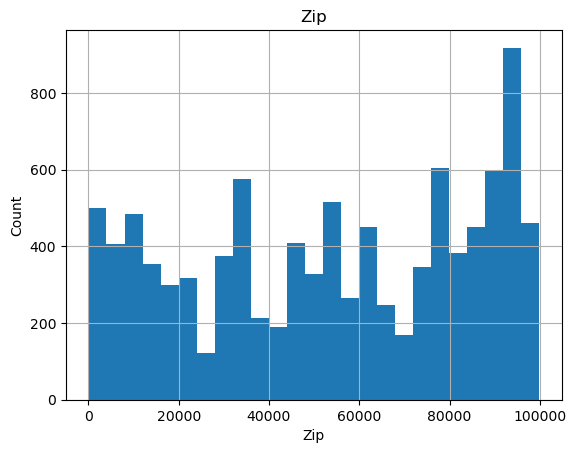

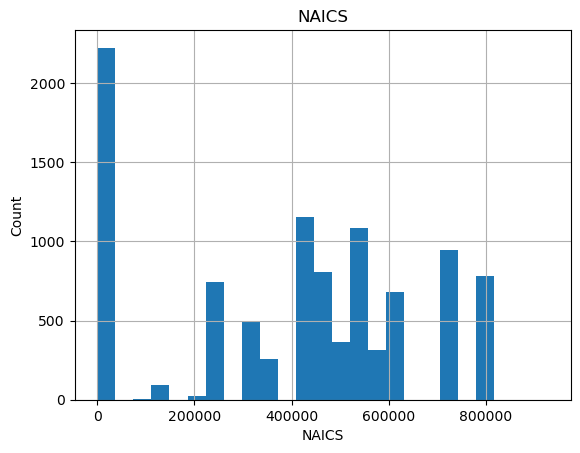

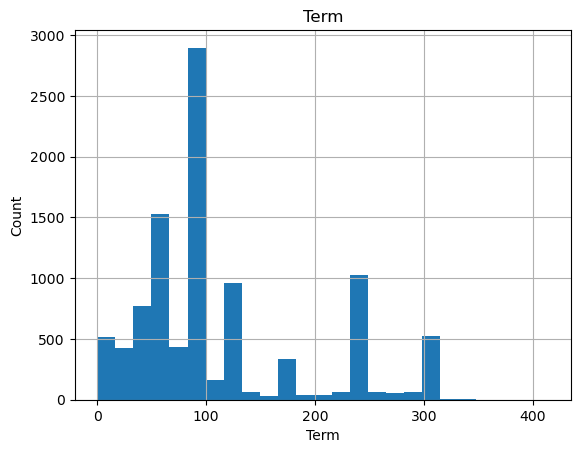

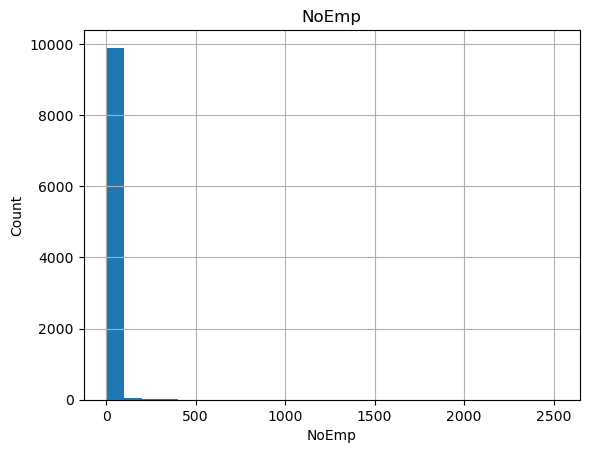

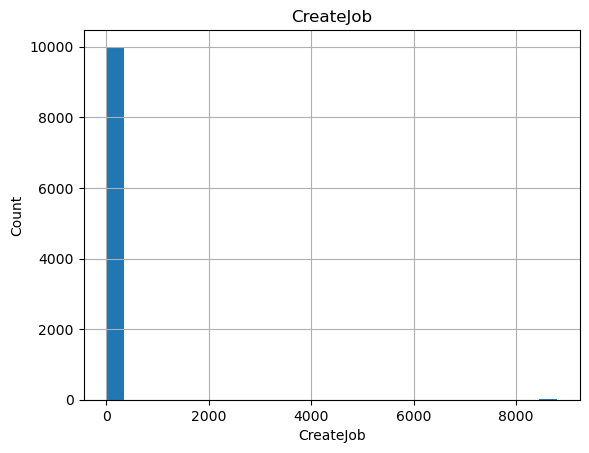

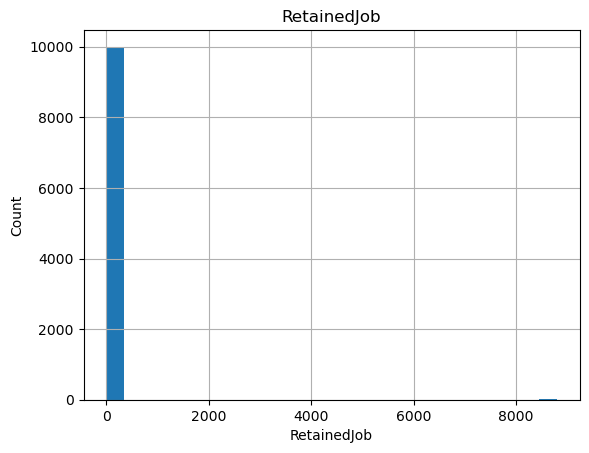

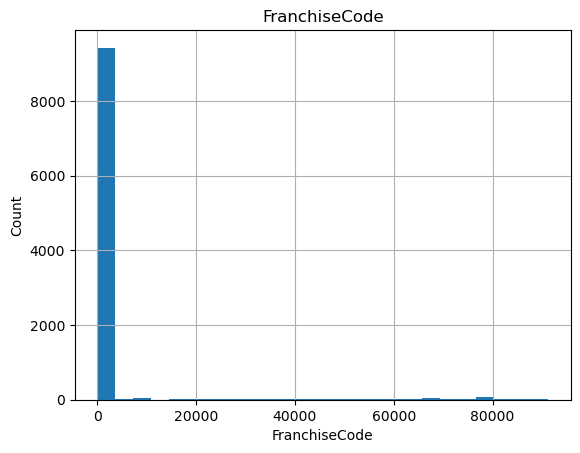

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns
for feature in continuous_feature:
        data=dataset.copy()
        data[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()
  

In [358]:
x=dataset.CreateJob.unique()
print(x)

[   6    0    2    1    4   15   20   12   14    3    8   38    5   45
   18    9   30   11    7   10   60   31   13   21   19   41   16   93
   24   40   25   72   22   55   50   33   85  100   17   65   27   23
   26   28   29   32   66 8800  200   47   49   35   34  150   75   53
  108  455   37   36   44  180]


In [359]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        print(feature)

Zip
NAICS
Term
NoEmp
CreateJob
RetainedJob
FranchiseCode


In [360]:
x=dataset.CreateJob.unique()
print(x)

[   6    0    2    1    4   15   20   12   14    3    8   38    5   45
   18    9   30   11    7   10   60   31   13   21   19   41   16   93
   24   40   25   72   22   55   50   33   85  100   17   65   27   23
   26   28   29   32   66 8800  200   47   49   35   34  150   75   53
  108  455   37   36   44  180]


## Categorical and numerical variables encoding

Encode categorical variables using either one of the techniques below. Don't use LabelEncoder.
- One-hot-encoder for variables with less than 10 valid values. Name your new columns "Original_name"_valid_value
- Target encoder from the following library: https://contrib.scikit-learn.org/category_encoders/index.html . Name your new column "Original_name"_trg
- WOE encoder from the following library: https://contrib.scikit-learn.org/category_encoders/index.html . Name your new column "Original_name"_woe


WOE encoder can be used with numerical variables too. 


Example of use for target encoder:
```
import category_encoders as ce

encoder = ce.TargetEncoder(cols=[...])

encoder.fit(X, y)
X_cleaned = encoder.transform(X_dirty)
```

In [361]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
categorical_features

['City',
 'State',
 'Bank',
 'BankState',
 'RevLineCr',
 'LowDoc',
 'DisbursementGross',
 'BalanceGross',
 'GrAppv',
 'SBA_Appv']

In [362]:
dataset[categorical_features].nunique()
    

City                 3894
State                  51
Bank                 1399
BankState              53
RevLineCr               5
LowDoc                  8
DisbursementGross    3328
BalanceGross            1
GrAppv               1670
SBA_Appv             2425
dtype: int64

In [363]:
dataset['LowDoc'] = np.where(dataset['LowDoc'] == 'N', 0, 1)


In [364]:
dataset['RevLineCr'] = np.where(dataset['RevLineCr'] == 'N', 0, 1)


In [365]:
dataset.loc[(dataset['NewExist'] == 1), 'NewBusiness'] = 0
dataset.loc[(dataset['NewExist'] == 2), 'NewBusiness'] = 1

In [366]:
data1= dataset.copy()


In [367]:
dataset.dropna(subset=['NewBusiness'], inplace=True)

In [368]:
data1.head()

,index,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status,NewBusiness
0,0,GLEN BURNIE,MD,21060,"BUSINESS FINANCE GROUP, INC.",VA,811111,240,7,1.0,6,7,1,1,1,0,743000.00,0.00,743000.00,743000.00,0,0.0
1,1,WEST BEND,WI,53095,JPMORGAN CHASE BANK NATL ASSOC,IL,722410,240,20,1.0,0,0,1,0,0,0,137000.00,0.00,137000.00,109737.00,0,0.0
2,2,SAN DIEGO,CA,92128,UMPQUA BANK,OR,0,120,2,1.0,0,0,1,0,1,0,280000.00,0.00,280000.00,210000.00,0,0.0
3,3,WEBSTER,MA,1570,HOMETOWN BANK A CO-OPERATIVE B,MA,621310,84,7,1.0,0,0,1,1,1,1,144500.00,0.00,144500.00,122825.00,0,0.0
4,4,JOPLIN,MO,64804,U.S. BANK NATIONAL ASSOCIATION,OH,0,60,2,2.0,0,0,1,0,0,1,52500.00,0.00,52500.00,42000.00,0,1.0


In [369]:
dataset['Same_State'] = np.where(dataset['State'] == dataset['BankState'],1,0)

In [370]:
dataset['IsFranchise'] = np.where(dataset['FranchiseCode']>=1, 1, 0)

In [371]:
dataset['AppvDisbursed'] = np.where(dataset['DisbursementGross'] == dataset['GrAppv'], 1, 0)

In [372]:
dataset = dataset.astype({ 'DisbursementGross': 'float', 'BalanceGross': 'float', 'GrAppv': 'float', 'SBA_Appv': 'float', 'NewBusiness': 'int64'})

In [373]:
dataset.head()

,index,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status,NewBusiness,Same_State,IsFranchise,AppvDisbursed
0,0,GLEN BURNIE,MD,21060,"BUSINESS FINANCE GROUP, INC.",VA,811111,240,7,1.0,6,7,1,1,1,0,743000.0,0.0,743000.0,743000.0,0,0,0,1,1
1,1,WEST BEND,WI,53095,JPMORGAN CHASE BANK NATL ASSOC,IL,722410,240,20,1.0,0,0,1,0,0,0,137000.0,0.0,137000.0,109737.0,0,0,0,1,1
2,2,SAN DIEGO,CA,92128,UMPQUA BANK,OR,0,120,2,1.0,0,0,1,0,1,0,280000.0,0.0,280000.0,210000.0,0,0,0,1,1
3,3,WEBSTER,MA,1570,HOMETOWN BANK A CO-OPERATIVE B,MA,621310,84,7,1.0,0,0,1,1,1,1,144500.0,0.0,144500.0,122825.0,0,0,1,1,1
4,4,JOPLIN,MO,64804,U.S. BANK NATIONAL ASSOCIATION,OH,0,60,2,2.0,0,0,1,0,0,1,52500.0,0.0,52500.0,42000.0,0,1,0,1,1


In [374]:
dataset.drop(columns=['index', 'Bank', 'City', 'Zip', 'NAICS','SBA_Appv'], inplace=True)

In [375]:
dataset.drop(columns=['BalanceGross'], inplace=True)

In [376]:
dataset.drop(columns=['NewExist'], inplace=True)

In [377]:
dataset.head()

,State,BankState,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,MIS_Status,NewBusiness,Same_State,IsFranchise,AppvDisbursed
0,MD,VA,240,7,6,7,1,1,1,0,743000.0,743000.0,0,0,0,1,1
1,WI,IL,240,20,0,0,1,0,0,0,137000.0,137000.0,0,0,0,1,1
2,CA,OR,120,2,0,0,1,0,1,0,280000.0,280000.0,0,0,0,1,1
3,MA,MA,84,7,0,0,1,1,1,1,144500.0,144500.0,0,0,1,1,1
4,MO,OH,60,2,0,0,1,0,0,1,52500.0,52500.0,0,1,0,1,1


In [378]:
dataset.isnull().sum()

State                0
BankState            0
Term                 0
NoEmp                0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
GrAppv               0
MIS_Status           0
NewBusiness          0
Same_State           0
IsFranchise          0
AppvDisbursed        0
dtype: int64

In [379]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              9974 non-null   object 
 1   BankState          9974 non-null   object 
 2   Term               9974 non-null   int64  
 3   NoEmp              9974 non-null   int64  
 4   CreateJob          9974 non-null   int64  
 5   RetainedJob        9974 non-null   int64  
 6   FranchiseCode      9974 non-null   int64  
 7   UrbanRural         9974 non-null   int64  
 8   RevLineCr          9974 non-null   int32  
 9   LowDoc             9974 non-null   int32  
 10  DisbursementGross  9974 non-null   float64
 11  GrAppv             9974 non-null   float64
 12  MIS_Status         9974 non-null   int64  
 13  NewBusiness        9974 non-null   int64  
 14  Same_State         9974 non-null   int32  
 15  IsFranchise        9974 non-null   int32  
 16  AppvDisbursed      9974 

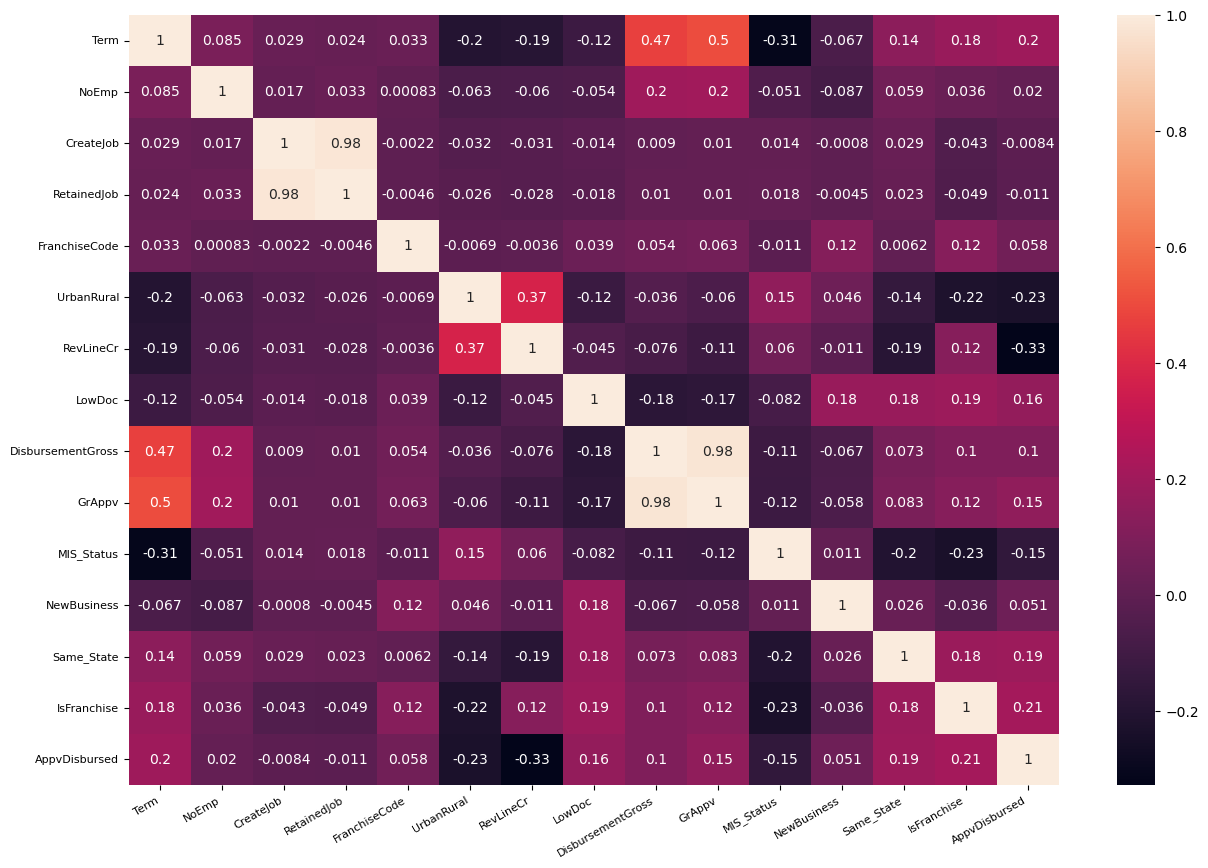

In [329]:
# Correlation Matrix
cor_fig, cor_ax = plt.subplots(figsize=(15, 10))
corr_matrix = dataset.corr()
cor_ax = sns.heatmap(corr_matrix, annot=True)
plt.xticks(rotation=30, horizontalalignment='right', fontsize=8)
plt.yticks(fontsize=8)

plt.show()

In [ ]:
datanew=dataset.copy()

In [ ]:
sns.pairplot(datanew)

# Model Training

See Project summary for types of models

In [383]:
feature_scale=[feature for feature in dataset.columns if feature not in ['MIS_Status','State','BankState']]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(dataset[feature_scale])

array([[ 1.62665257, -0.10121266, -0.012327  , ..., -1.03593709,
         0.54931675,  0.56276076],
       [ 1.62665257,  0.23827142, -0.03640405, ..., -1.03593709,
         0.54931675,  0.56276076],
       [ 0.11703192, -0.23178347, -0.03640405, ..., -1.03593709,
         0.54931675,  0.56276076],
       ...,
       [-0.33585427, -0.23178347, -0.03640405, ...,  0.96530958,
         0.54931675,  0.56276076],
       [-0.91454218,  0.00324398, -0.02837836, ..., -1.03593709,
        -1.82044331,  0.56276076],
       [ 1.62665257,  0.02935814, -0.012327  , ...,  0.96530958,
         0.54931675,  0.56276076]])

In [384]:
feature_scale

['Term',
 'NoEmp',
 'CreateJob',
 'RetainedJob',
 'FranchiseCode',
 'UrbanRural',
 'RevLineCr',
 'LowDoc',
 'DisbursementGross',
 'GrAppv',
 'NewBusiness',
 'Same_State',
 'IsFranchise',
 'AppvDisbursed']

In [385]:
 dataset_scaled=pd.DataFrame(scaler.fit_transform(dataset[feature_scale]), columns=feature_scale)

In [386]:
dataset_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9974 entries, 0 to 9973
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Term               9974 non-null   float64
 1   NoEmp              9974 non-null   float64
 2   CreateJob          9974 non-null   float64
 3   RetainedJob        9974 non-null   float64
 4   FranchiseCode      9974 non-null   float64
 5   UrbanRural         9974 non-null   float64
 6   RevLineCr          9974 non-null   float64
 7   LowDoc             9974 non-null   float64
 8   DisbursementGross  9974 non-null   float64
 9   GrAppv             9974 non-null   float64
 10  NewBusiness        9974 non-null   float64
 11  Same_State         9974 non-null   float64
 12  IsFranchise        9974 non-null   float64
 13  AppvDisbursed      9974 non-null   float64
dtypes: float64(14)
memory usage: 1.1 MB


In [388]:
X = dataset_scaled

In [387]:
y = dataset["MIS_Status"]

In [283]:
datanew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9982 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              9982 non-null   int64  
 1   City               9982 non-null   object 
 2   State              9982 non-null   object 
 3   Zip                9982 non-null   int64  
 4   Bank               9982 non-null   object 
 5   BankState          9982 non-null   object 
 6   NAICS              9982 non-null   int64  
 7   Term               9982 non-null   int64  
 8   NoEmp              9982 non-null   int64  
 9   NewExist           9981 non-null   float64
 10  CreateJob          9982 non-null   int64  
 11  RetainedJob        9982 non-null   int64  
 12  FranchiseCode      9982 non-null   int64  
 13  UrbanRural         9982 non-null   int64  
 14  RevLineCr          9982 non-null   object 
 15  LowDoc             9982 non-null   object 
 16  DisbursementGross  9982 

In [389]:
from sklearn.model_selection import train_test_split


In [390]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [391]:
from sklearn.linear_model import LogisticRegression


In [405]:
print(X_train)

          Term     NoEmp  CreateJob  RetainedJob  FranchiseCode  UrbanRural  \
5433 -0.562297 -0.205669  -0.036404    -0.046755      -0.216549   -1.185027   
5635  0.356055  1.021696  -0.036404    -0.046755      -0.216549   -1.185027   
2428  1.626653 -0.127327  -0.036404    -0.046755      -0.216549   -1.185027   
5394 -1.241627  0.159929  -0.036404    -0.046755      -0.216549   -1.185027   
7930  1.626653  0.629984  -0.036404     0.032210      -0.216549   -1.185027   
...        ...       ...        ...          ...            ...         ...   
5787  1.626653  1.021696   0.003724    -0.046755      -0.216549    0.372830   
1262  1.626653 -0.022870  -0.036404    -0.007273      -0.216549   -1.185027   
5906  1.626653  0.499413   0.007737     0.028261      -0.216549   -1.185027   
8315 -0.260373 -0.127327  -0.036404    -0.046755      -0.216549    0.372830   
9470 -0.335854 -0.257898  -0.036404    -0.042807      -0.216549    0.372830   

      RevLineCr    LowDoc  DisbursementGross    GrA

In [393]:
print(y_train)

5446    0
5649    0
2435    0
5407    0
7951    0
       ..
5801    0
1264    0
5920    0
8336    1
9493    0
Name: MIS_Status, Length: 7979, dtype: int64


In [394]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [395]:
predictions = model.predict(X_test)


In [396]:
from sklearn.metrics import classification_report, confusion_matrix


In [397]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1632
           1       0.72      0.32      0.44       363

    accuracy                           0.85      1995
   macro avg       0.79      0.65      0.68      1995
weighted avg       0.84      0.85      0.83      1995



In [398]:
confusion_matrix(y_test, predictions)


array([[1586,   46],
       [ 246,  117]], dtype=int64)

In [404]:
predictions

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [402]:
y_test

1402    1
5325    0
9908    0
758     0
3461    1
       ..
7548    0
7412    0
6767    0
634     0
3766    0
Name: MIS_Status, Length: 1995, dtype: int64

## ==============================================